# Alan Donahue Ch 8 Exercises

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [26]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [27]:
import random

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)


def firstEstimate(n = 7, iters = 30_000):
    """
    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for i in range(iters):
        xs = [random.gauss(mu, sigma) for j in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print(f"Mean Error xbar: {MeanError(means, mu)}")
    print(f"Mean Error Median: {MeanError(medians, mu)}")
    
    
firstEstimate()
print()
firstEstimate(7, 100_000)



Experiment 1
Mean Error xbar: 0.002416481432980333
Mean Error Median: 0.0002991177284480211

Experiment 1
Mean Error xbar: 0.0002490259853092899
Mean Error Median: -7.844865721920528e-05


As the number of iterations increases, the mean error xbar and median get closer to 0. 

In [28]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def secondEstimate(n = 7, iters = 30_000):
    """
    RMSE for biased and unbiased
    n: sample size
    iters: number of iterations
    """
    
    mu = 0
    sigma = 1
    
    estimates1 = []
    estimates2 = []
    for i in range(iters):
        xs = [random.gauss(mu, sigma) for j in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof = 1)
        estimates1.append(biased)
        estimates2.append(unbiased)
        
    print("Experiment 2")
    print(f"RMSE biased: {RMSE(estimates1, sigma**2)}")
    print(f"RMSE unbiased: {RMSE(estimates2, sigma**2)}")
    
secondEstimate()
print()
secondEstimate(7, 100_000)


Experiment 2
RMSE biased: 0.5203789936792917
RMSE unbiased: 0.5846338688970953

Experiment 2
RMSE biased: 0.5149338234639507
RMSE unbiased: 0.5772246510289456


The biased RMSE produces a lower RMSE than the unbiased estimator. 

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



Standard Error: 0.8262470455984311
Confidence interval: (1.268409000436799, 3.6216500029913448)

Standard Error: 0.29114091614073756
Confidence interval: (1.6060983269115041, 2.5562855516634113)


0.29114091614073756

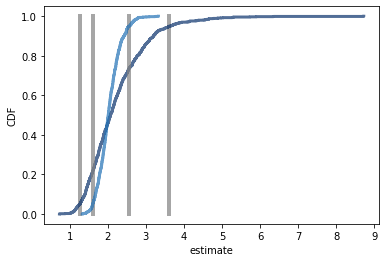

In [29]:
def verticalLine(x, y = 1):
    thinkplot.Plot([x, x], [0, y], color = "0.5", linewidth = 4)

def sampleExperiment(lam = 2, n = 10, iters = 1_000):
    """
    lam: parameter of an exponetial distribution
    n: sample size
    iters: number of iterations
    """
    
    estimates = []
    for i in range(iters):
        xs = np.random.exponential(1 / lam, n)
        lamhat = 1 / np.mean(xs)
        estimates.append(lamhat)
        
    stderr = RMSE(estimates, lam)
    print(f"Standard Error: {stderr}")
    
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print(f"Confidence interval: {ci}")
    
    verticalLine(ci[0])
    verticalLine(ci[1])
    
    thinkplot.Cdf(cdf)
    thinkplot.config(xlabel = "estimate",
                     ylabel = "CDF")
    
    return stderr

sampleExperiment()
print()
sampleExperiment(2, 50, 1_000)


When the sample size is equal to 10, the Standard Error is .737 and the confidence interval is from 1.266 to 3.432. When the sample size increases (n = 50), the Standard Error becomes smaller and the confidence interval shrinks.